In [1]:
1+1 

2

In [2]:
from github import Github

In [3]:
g = Github("username", "password")

In [4]:
repo = g.get_repo("CSSEGISandData/COVID-19")

In [5]:
contents = repo.get_contents("")

In [6]:
print(contents)

[ContentFile(path=".gitignore"), ContentFile(path="README.md"), ContentFile(path="archived_data"), ContentFile(path="csse_covid_19_data"), ContentFile(path="who_covid_19_situation_reports")]


In [7]:
for index in contents:
    print(index)

ContentFile(path=".gitignore")
ContentFile(path="README.md")
ContentFile(path="archived_data")
ContentFile(path="csse_covid_19_data")
ContentFile(path="who_covid_19_situation_reports")


In [8]:
contents = repo.get_contents("csse_covid_19_data/csse_covid_19_daily_reports")

In [19]:
for index in contents:
    url = index.download_url
    print(url)

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/.gitignore
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-22-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-23-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-24-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-25-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-26-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-27-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-

In [9]:
import bs4 as bs
import urllib.request

In [10]:
# all_data will be an array of lines that will contain all of the data.
# we are clearing the array here.
all_data = []

# Iterate through all of the URLs
for index in contents:
    url = index.download_url
    
    # Is content_file a file with the .csv extension
    if (".csv" in url):
        print(url)
        
        # Grab the source contents of the file
        source = urllib.request.urlopen(url).read()
        decoded_data = source.decode("utf-8")
        
        # Take the long string and split it for every newline character \n
        array = decoded_data.split('\n')
        
        # Now iterate for every line in the array called "array"
        for line in array:
            
            # Make sure its not the first line that has a text header and no valuable data
            if not("Confirmed" in line):
                
                # Remove any \r delimiter characters. Google what \r and \n are
                # used for. Traditionaly they are used to indicate the end of a line.
                # Sometimes only one is used, and sometimes both are used. In this
                # case they are both used, and we already split the lines based on \n
                # which means we need to strip the special character from each line.
                newline = str(line).strip('\r')
                
                # Finally append the new line to the array called all_data
                all_data.append(newline.split(','))
        

https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-22-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-23-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-24-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-25-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-26-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-27-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-28-2020.csv
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports

In [12]:
print(all_data[0])
print(all_data[1])
print(all_data[2])

['Anhui', 'Mainland China', '1/22/2020 17:00', '1', '', '']
['Beijing', 'Mainland China', '1/22/2020 17:00', '14', '', '']
['Chongqing', 'Mainland China', '1/22/2020 17:00', '6', '', '']


In [13]:
COUNTRY = "US"
EXCLUDE = "Diamond" 

#COUNTRY = "Italy"
#EXCLUDE = "NOTHING"

In [14]:
total       = 0
total_death = 0
percent     = []

# Print header
#
print("{0:20} {1:10} {2:10} {3:14} {4:10}".format("date", "death", "confirmed", "total_dead", "percent"))
   
# Print Sample events of death reporting
#
for data in all_data:
    
    # Look for your desired Country
    if ((str(data).find(COUNTRY) > 0) and not(str(data).find(EXCLUDE) > 0)):
        
        # Assign index locations. 
        #    Since the reporting structure has changed over time, the index
        #    locations are not constant, at move. However the timestamp, and rates
        #    are consistent sample in relative position to the desire country.
        #    CNT represents the index location in the CSV line, where the desired
        #    country was located. All other indexes are calculated relative to this
        #    location.
        CNT        = (data.index(COUNTRY))
        
        # US was found labeled once in two columns, this checks to see if the next
        # column also contains the same verbiage, is so, readjust the index to +1
        if (COUNTRY in data[CNT+1]):  #adjust for anomoly of double Country
            CNT    = CNT + 1
            
        # Assign all of the index locations for this sample line
        date      = CNT + 1
        confirmed = CNT + 2
        death     = CNT + 3
        recovered = CNT + 4
        
        
        # Does the confirmed field have a number
        if(len(data[confirmed]) > 0):
            total = total + int(data[confirmed])
           
        # Does the death field have a number
        if(len(data[death]) > 0):
            
            # Is the number greater than zero
            if (int(data[death]) > 0):
    
                total_death = total_death + int(data[death])
        
                percent_increase = (total_death / total) * 100
            
                # Append to list new float value
                percent.append(float(percent_increase))
                
                # Print death sample date, and running totals
                print("{0:20} {1:10} {2:10} {3:10} {4:10.4f}".format(data[date], data[death], str(total), str(total_death), percent_increase))

date                 death      confirmed  total_dead     percent   
2020-02-29T22:33:03  1          455        1              0.2198
2020-03-01T21:13:12  1          484        2              0.4132
2020-03-02T20:23:16  5          521        7              1.3436
2020-03-02T20:53:02  1          538        8              1.4870
2020-03-03T20:23:05  6          584        14             2.3973
2020-03-03T20:23:05  1          601        15             2.4958
2020-03-04T19:53:02  9          671        24             3.5768
2020-03-04T19:53:02  1          700        25             3.5714
2020-03-04T19:53:02  1          722        26             3.6011
2020-03-05T22:03:17  10         799        36             4.5056
2020-03-05T20:23:07  1          837        37             4.4205
2020-03-04T19:53:02  1          893        38             4.2553
2020-03-06T23:13:07  12         982        50             5.0916
2020-03-06T23:13:07  1          1021       51             4.9951
2020-03-06T23:13:07  

In [15]:
print(len(percent))
print(percent[0])
print(percent[1])
print(percent[len(percent)-1])

215
0.21978021978021978
0.4132231404958678
1.5772663633181658


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

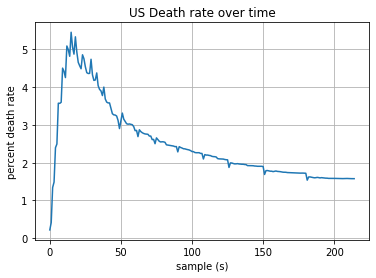

In [17]:
fig, ax = plt.subplots()
samp = range(0,len(percent))

ax.plot(samp, percent)

ax.set(xlabel='sample (s)', ylabel='percent death rate',
       title= COUNTRY +' Death rate over time')
ax.grid()


In [18]:
total       = 0
lat         = []
lon         = []
con         = []
#print("{0:15} {1:15} {2:15}".format("Confirmed", "Latitude", "Longitude") )
                

for data in all_data:
    
   # Look for your desired Country
   if ((str(data).find("US") > 0) and not(str(data).find("Diamond") > 0)):
        
        # Assign index locations. 
        #    Since the reporting structure has changed over time, the index
        #    locations are not constant, at move. However the timestamp, and rates
        #    are consistent sample in relative position to the desire country.
        #    CNT represents the index location in the CSV line, where the desired
        #    country was located. All other indexes are calculated relative to this
        #    location.
        US        = (data.index('US'))
        
        # US was found labeled once in two columns, this checks to see if the next
        # column also contains the same verbiage, is so, readjust the index to +1
        if ("US" in data[US+1]):  #adjust for anomoly
            US    = US + 1
            
         # Assign all of the index locations for this sample line
        date      = US + 1
        confirmed = US + 2
        death     = US + 3
        recovered = US + 4    
        Latitude  = US + 5
        Longitude = US + 6
        
        # Does the confirmed field have a number
        if (len(data[confirmed]) > 0):
            total = total + int(data[confirmed])
        
        # Only the lines width 8 fields have longitude and latitude
        if (len(data)==8):
            
            # Does Latitude have a valid positive number for continental US only
            if (len(data[Latitude]) > 0):
                
                # Does Longitude have a negative number for continental US only
                if (float(data[Longitude]) < 0.0):  # eliminate Guam
                    
                    # Append data to arrays. We have an Array for Number Confirmed, Latitude, and Longitude
                    # The number confirmed will be used for the size of the red dot.
                    con.append(float(data[confirmed]))
                    lat.append(float(data[Latitude]))
                    lon.append(float(data[Longitude]))

# What is the bounding box for the map
BBox = ( float(min(lon, key=float)),float(max(lon, key=float)), float(min(lat, key=float)),float(max(lat, key=float)) )
print(BBox)

# Print all of the coordinants
for i in range(len(lon)):
    print(con[i],lon[i], lat[i])

(-157.498337, -64.8963, 18.2208, 61.370716)
21.0 -122.6655 37.6489
21.0 -122.6655 37.6489
21.0 -122.6655 37.6489
267.0 -121.4905 47.4009
173.0 -74.9481 42.1657
144.0 -119.6816 36.1162
92.0 -71.5301 42.2302
21.0 -122.6655 37.6489
17.0 -83.6431 33.0406
15.0 -105.3111 39.0598
15.0 -81.6868 27.7663
15.0 -74.521 40.2989
15.0 -122.0709 44.572
13.0 -97.5635 31.0545
12.0 -88.9861 40.3495
12.0 -77.2098 40.5908
8.0 -93.2105 42.0115
8.0 -76.8021 39.0639
7.0 -79.8064 35.6301
7.0 -80.945 33.8569
7.0 -86.6923 35.7478
7.0 -78.17 37.7693
6.0 -111.4312 33.7298
6.0 -86.2583 39.8494
6.0 -84.6701 37.6681
5.0 -77.0268 38.8974
4.0 -117.0554 38.3135
4.0 -71.5639 43.4525
3.0 -93.9002 45.6945
3.0 -98.2681 41.1254
3.0 -82.7649 40.3888
3.0 -71.5118 41.6809
3.0 -89.6165 44.2685
2.0 -72.7554 41.5978
2.0 -157.4983 21.0943
2.0 -96.9289 35.5653
2.0 -111.8624 40.15
1.0 -96.7265 38.5266
1.0 -91.8678 31.1695
1.0 -92.2884 38.4561
1.0 -72.7107 44.0459
0.0 -152.4044 61.3707
0.0 -92.3731 34.9697
0.0 -75.5071 39.3185
0.0 -11

In [19]:
%matplotlib notebook

In [20]:
repo = g.get_repo("ehsintegration/COVID-19")
contents = repo.get_contents("us-map.png")
url = contents.download_url
print(url)
usmap = plt.imread(url)

https://raw.githubusercontent.com/ehsintegration/COVID-19/master/us-map.png


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time

<IPython.core.display.Javascript object>


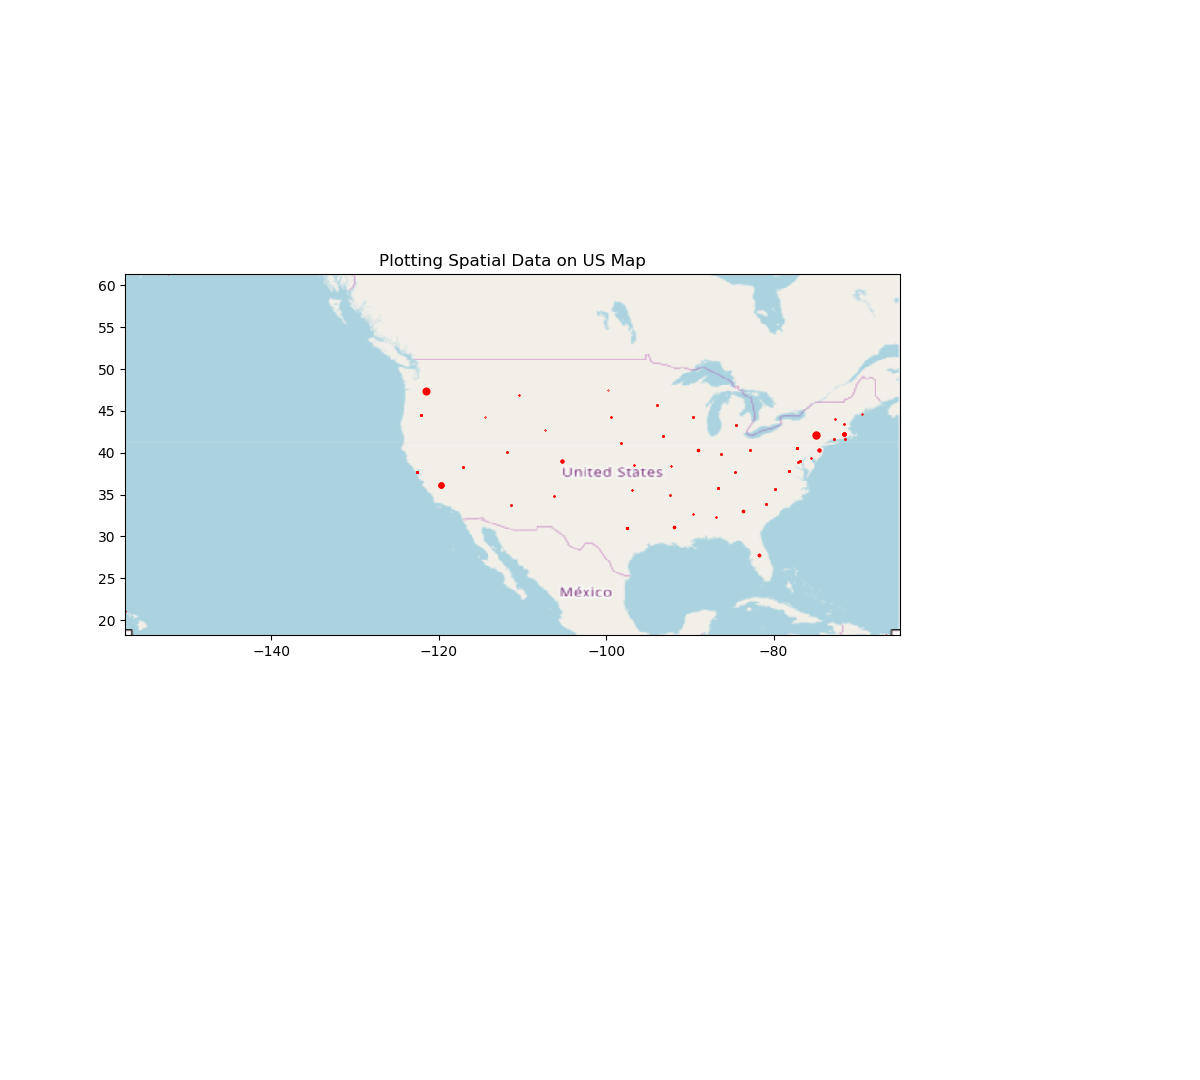

C:\Users\ediaz\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.


KeyboardInterrupt: 

In [22]:
fig, ax = plt.subplots(figsize = (10,9))
ax.set_title('Plotting Spatial Data on US Map')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])

plt.ion()
fig.show()
fig.canvas.draw()
ax.imshow(usmap, extent = BBox, aspect= 'equal')

# Wait so I had time to setup CAMSTASIA
time.sleep(2)

# Get the maximum Confirmed case
mxc = max(con, key=int)

# Iterate through all of the coordinates
for i in range(len(con)):
    
    # This will normalize the confirmed case to 1 , and then multiply by 300
    data_con = (con[i] / mxc) * 300
    
    # Get the current coordinates
    data_lon = lon[i]
    data_lat = lat[i]
    
    ax.scatter(data_lon, data_lat, zorder=1, alpha= 1.0, c='R', s=data_con)
    fig.canvas.draw()   # draw
    
    # This slows the plot down so that we can see time progress
    # also matplotlib needs a sleep for an continuous plot.
    time.sleep(0.001)   #sleep

# Wait so I had time to stop CAMSTASIA
time.sleep(3)

# Clear the figure
fig.clf()